# ArbPredict: Data Cleaning Procedure

This notebook focuses on importing, restricting, tranforming, and cleaning the data to be used for training and analysis.

The key aspects are:
* Which pieces of data are intuitively unnecessary or superfluous?
* What is the best way to encode that various data structures for optimal use?

Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import HelperFunctions as helper

Import desired datasets

In [2]:
# First import disparate datasets that will be combined into one dataframe

df_players = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/People.csv')
df_salary = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/Salaries.csv')
df_batting = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/Batting.csv')
df_fielding = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/Fielding.csv')
df_pitching = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/Pitching.csv')
df_votes = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/AwardsSharePlayers.csv')
df_awards = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/AwardsPlayers.csv')
df_allstar = pd.read_csv('C:/Python310/Projects/Baseball/Statistics2020/AllstarFull.csv')

In [3]:
print(df_players.shape)
print(df_salary.shape)
print(df_batting.shape)
print(df_fielding.shape)
print(df_pitching.shape)
print(df_votes.shape)
print(df_awards.shape)
print(df_allstar.shape)

(20358, 24)
(26428, 5)
(108789, 22)
(144768, 18)
(48399, 30)
(6879, 7)
(6236, 6)
(5375, 8)


In [4]:
yr = 2000
yr_str = '2000-04-01'

df_players = df_players[df_players.debut > yr_str]

In [5]:
df_players['debut'].min()

'2000-04-03'

Now to trim down the complementary datasets

In [6]:
df_salary = df_salary[df_salary.yearID >= yr]
df_batting = df_batting[df_batting.yearID >= yr]
df_fielding = df_fielding[df_fielding.yearID >= yr]
df_pitching = df_pitching[df_pitching.yearID >= yr]
df_awards = df_awards[df_awards.yearID >= yr]
df_votes = df_votes[df_votes.yearID >= yr]
df_allstar = df_allstar[df_allstar.yearID >= yr]

In [7]:
player_debut = df_players[['playerID','debut']]

In [8]:
df_batting['yearID'].min()

2000

In [9]:
df_players.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

Now we trim the superfluous columns

In [10]:
df_players.drop(labels=['birthState','birthCity','deathYear','deathMonth','deathDay',
                        'deathCountry','deathState','deathCity','nameGiven','retroID','bbrefID'],axis=1,inplace=True)

In [11]:
df_players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame
0,aardsda01,1981.0,12.0,27.0,USA,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23
4,abadan01,1972.0,8.0,25.0,USA,Andy,Abad,184.0,73.0,L,L,2001-09-10,2006-04-13
5,abadfe01,1985.0,12.0,17.0,D.R.,Fernando,Abad,235.0,74.0,L,L,2010-07-28,2021-10-01
10,abbotco01,1995.0,9.0,20.0,USA,Cory,Abbott,210.0,73.0,R,R,2021-06-05,2021-10-02
22,abercre01,1980.0,7.0,15.0,USA,Reggie,Abercrombie,215.0,75.0,R,R,2006-04-04,2008-09-28


In [12]:
df_batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
79265,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0
79266,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0
79267,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
79268,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,79.0,28.0,8.0,100,116.0,9.0,1.0,0.0,3.0,12.0
79269,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0


Group the master dataset by playerID and yearID

In [13]:
df_salary_grp = df_salary.groupby(['playerID','yearID']).agg({'salary':'sum'})
df_salary_grp

salary
playerID  yearID         
aardsda01 2004     300000
          2007     387500
          2008     403250
          2009     419000
          2010    2750000
...                   ...
zumayjo01 2010     915000
          2011    1400000
zuninmi01 2014     504100
          2015     523500
zychto01  2016     511000

[14161 rows x 1 columns]

Extract a list of all active players in examined period and their fourth year (arbitration) values.

This will serve as the training set. Note an entry of 0 indicates no fourth year was played.

In [14]:
df_arb = df_salary_grp.groupby('playerID').agg({'salary':helper.fourthYear}).reset_index()
df_arb

,playerID,salary
0,aardsda01,419000
1,abadan01,0
2,abadfe01,1087500
3,abbotje01,0
4,abbotku01,0
...,...,...
3354,zobribe01,438100
3355,zuletju01,0
3356,zumayjo01,735000
3357,zuninmi01,0


Now to determine the number of seasons each player was in the MLB.

The desired dataframe consists of the playerID, the fourth year (arb) salary, and the number of seasons in there career.

In [15]:
df_sal_grouped_seas = df_salary.groupby(['playerID'])['yearID'].unique().reset_index() 
df_sal_grouped_seas.head() # recording number of seasons played after 1999

,playerID,yearID
0,aardsda01,"[2004, 2007, 2008, 2009, 2010, 2011, 2012]"
1,abadan01,[2006]
2,abadfe01,"[2011, 2012, 2014, 2015, 2016]"
3,abbotje01,"[2000, 2001]"
4,abbotku01,"[2000, 2001]"


In [16]:
df_sal_grouped_seas['seasons'] = df_sal_grouped_seas['yearID'].apply(lambda x: len(x)) 
df_sal_grouped_seas.drop(['yearID'],axis=1,inplace=True)
df_sal_grouped_seas.head()


,playerID,seasons
0,aardsda01,7
1,abadan01,1
2,abadfe01,5
3,abbotje01,2
4,abbotku01,2


In [17]:
df_arb = pd.merge(df_arb, df_sal_grouped_seas, on='playerID', how='left')
print(df_arb.shape)
df_arb.head()

(3359, 3)


,playerID,salary,seasons
0,aardsda01,419000,7
1,abadan01,0,1
2,abadfe01,1087500,5
3,abbotje01,0,2
4,abbotku01,0,2


Time to engineer the availible data to include precentage data

In [18]:
df_batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000,29524.000000
mean,2010.221515,1.088572,48.005826,114.582712,15.334812,29.710676,5.931513,0.610961,3.603272,14.608590,1.899810,0.753387,10.815540,24.192691,0.793355,1.187746,0.964910,0.901436,2.579427
std,6.066995,0.301594,45.046393,176.437925,26.207092,48.984723,10.194683,1.509687,7.454549,25.760595,5.463596,1.862435,19.507659,36.429902,2.482976,2.612236,2.141156,1.809447,4.593759
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,1.000000,32.000000,15.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,1.000000,70.000000,164.000000,19.000000,40.000000,8.000000,0.000000,3.000000,18.000000,1.000000,1.000000,13.000000,35.000000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2020.000000,5.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,160.000000,78.000000,24.000000,232.000000,223.000000,120.000000,30.000000,24.000000,16.000000,32.000000


In [19]:
#Total bases
df_batting['TB'] = df_batting['H']+2*df_batting['2B']+3*df_batting['3B']+4*df_batting['HR']

#Batting average
df_batting['BA'] = df_batting['H']/df_batting['AB']

#On base percentage
df_batting['OBP'] = (df_batting['H']+df_batting['BB']+df_batting['HBP'])/(df_batting['AB']+df_batting['BB']+df_batting['HBP']+df_batting['SF'])

#Slugging
df_batting['SLG'] = df_batting['TB']/df_batting['AB']

#OPS
df_batting['OPS'] = df_batting['OBP']+df_batting['SLG']

In [20]:
df_batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,TB,BA,OBP,SLG,OPS
79265,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,1.0,2.0,2.0,1.0,2.0,104,0.274419,0.343096,0.483721,0.826817
79266,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,2.0,1.0,0.0,1.0,2.0,75,0.216561,0.283237,0.477707,0.760944
79267,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0.0,0.0,1.0,0.0,0.0,4,0.400000,0.400000,0.800000,1.200000
79268,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,9.0,1.0,0.0,3.0,12.0,396,0.315972,0.416176,0.687500,1.103676
79269,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.500000,0.000000,0.500000


Now to aggregate the rookie (first 3 year) years for each batter

In [21]:
df_batting_grp = df_batting.groupby(['playerID','yearID']).agg({'G':'sum', 'AB':'sum', 'R':'sum', 'H':'sum',
       '2B':'sum', '3B':'sum', 'HR':'sum', 'RBI':'sum', 'SB':'sum', 'CS':'sum', 'BB':'sum', 'SO':'sum', 'IBB':'sum', 
        'HBP':'sum', 'SH':'sum','SF':'sum', 'GIDP':'sum', 'OBP':'sum', 
        'BA':'sum', 'TB':'sum', 'SLG':'sum', 'OPS':'sum'}).reset_index()
df_batting_grp = df_batting_grp.groupby('playerID').agg({'G':helper.rookieMean, 'AB':helper.rookieMean, 'R':helper.rookieMean, 'H':helper.rookieMean,
       '2B':helper.rookieMean, '3B':helper.rookieMean, 'HR':helper.rookieMean, 'RBI':helper.rookieMean, 'SB':helper.rookieMean, 'CS':helper.rookieMean, 'BB':helper.rookieMean,
        'SO':helper.rookieMean, 'IBB':helper.rookieMean,'HBP':helper.rookieMean, 'SH':helper.rookieMean,'SF':helper.rookieMean, 'GIDP':helper.rookieMean,
        'OBP':helper.rookieMean,'BA':helper.rookieMean, 'TB':helper.rookieMean, 'SLG':helper.rookieMean, 'OPS':helper.rookieMean}).reset_index()
print(df_batting_grp.shape)
df_batting_grp.head()

(5834, 23)


,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS
0,aardsda01,27.000000,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,abadan01,5.000000,7.000000,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.333333,0.203509,0.039216,0.666667,0.039216,0.242724
2,abadfe01,29.333333,2.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238
3,abbotje01,54.000000,128.500000,18.000000,35.000000,9.0,0.5,1.5,17.0,1.0,...,0.5,1.5,1.000000,0.5,1.500000,0.334592,0.268162,60.500000,0.444241,0.778833
4,abbotku01,42.500000,83.000000,11.000000,18.000000,3.5,0.5,3.0,6.0,1.0,...,1.0,0.5,0.000000,0.5,1.000000,0.252730,0.219391,38.500000,0.349965,0.602694


Now to aggregate the rookie (first 3 year) years for each pitcher

In [22]:
df_pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,...,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000,15495.000000
mean,2010.536560,1.088416,3.193288,3.193288,25.126299,6.387351,0.181284,0.074605,1.607615,170.935657,...,1.511649,2.132753,2.263117,0.200452,244.787351,6.206066,29.218780,1.838529,1.717586,4.915069
std,6.096758,0.299398,4.118126,3.605176,20.757949,10.462541,0.683850,0.337394,6.256801,174.814246,...,1.916409,2.588487,2.743267,0.522589,245.453600,10.532416,29.008314,2.548459,2.033255,5.732777
min,2000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,8.000000,0.000000,0.000000,1.000000
50%,2011.000000,1.000000,2.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,113.000000,...,1.000000,1.000000,1.000000,0.000000,165.000000,2.000000,19.000000,1.000000,1.000000,3.000000
75%,2016.000000,1.000000,4.000000,5.000000,34.000000,9.000000,0.000000,0.000000,0.000000,221.000000,...,2.000000,3.000000,3.000000,0.000000,313.000000,8.000000,38.000000,3.000000,3.000000,7.000000
max,2020.000000,5.000000,24.000000,21.000000,94.000000,36.000000,11.000000,6.000000,62.000000,798.000000,...,17.000000,25.000000,21.000000,6.000000,1071.000000,79.000000,152.000000,21.000000,14.000000,40.000000


In [23]:
df_pitching.rename(columns={"W": "W_p","L": "L_p","G": "G_p","GS": "GS_p","SHO": "SHO_p","SV": "SV_p","H": "H_p"
                  ,"ER": "ER_p","HR": "HR_p","IBB": "IBB_p","SO": "SO_p","R": "R_p","GIDP": "GIDP_p","SH": "SH_p",
                  "SF": "SF_p","HBP": "HBP_p","BB": "BB_p"}, errors="raise", inplace = True)

In [24]:
df_pitching['WHIP'] = (df_pitching['BB_p'] + df_pitching['H_p']) / ( (df_pitching['IPouts'])/3)

df_pitching['IP'] = df_pitching['IPouts'] /3

df_pitching['ERA'] = (9 * df_pitching['ER_p']) / df_pitching['IP']

df_pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W_p', 'L_p', 'G_p',
       'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'H_p', 'ER_p', 'HR_p', 'BB_p',
       'SO_p', 'BAOpp', 'ERA', 'IBB_p', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP'],
      dtype='object')

In [25]:
df_pitching_grp = df_pitching.groupby(['playerID','yearID']).agg({'W_p':'sum', 'L_p':'sum', 'G_p':'sum', 'GS_p':'sum',
       'CG':'sum', 'SHO_p':'sum', 'SV_p':'sum', 'IPouts':'sum', 'ER_p':'sum', 'HR_p':'sum', 'SO_p':'sum', 'BAOpp':'sum', 
        'HBP_p':'sum', 'SH_p':'sum','SF_p':'sum', 'GIDP_p':'sum', 'ERA':'sum', 'WP':'sum', 'BK':'sum',
        'BFP':'sum','GF':'sum','R_p':'sum','SH_p':'sum','WHIP':'sum','IP':'sum','IBB_p':'sum','BB_p':'sum'}).reset_index()
df_pitching_grp = df_pitching_grp.groupby('playerID').agg({'G_p':helper.rookieMean, 'W_p':helper.rookieMean, 'L_p':helper.rookieMean, 'GS_p':helper.rookieMean,
       'CG':helper.rookieMean, 'SHO_p':helper.rookieMean, 'SV_p':helper.rookieMean, 'IPouts':helper.rookieMean, 'ER_p':helper.rookieMean, 'HR_p':helper.rookieMean,
        'SO_p':helper.rookieMean, 'IBB_p':helper.rookieMean,'BAOpp':helper.rookieMean, 'ERA':helper.rookieMean,'WP':helper.rookieMean, 'HBP_p':helper.rookieMean,
        'BK':helper.rookieMean,'BFP':helper.rookieMean, 'GF':helper.rookieMean, 'R_p':helper.rookieMean, 'SH_p':helper.rookieMean,
        'SF_p':helper.rookieMean,'GIDP_p':helper.rookieMean,'WHIP':helper.rookieMean,'IP':helper.rookieMean,'BB_p':helper.rookieMean}).reset_index()

print(df_pitching_grp.shape)
df_pitching_grp.head()

(3456, 27)


,playerID,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,...,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p
0,aardsda01,27.000000,2.000000,0.333333,0.000000,0.000000,0.0,0.0,96.000000,18.333333,...,0.0,145.666667,7.0,19.0,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333
1,abadfe01,29.333333,0.333333,3.666667,2.000000,0.000000,0.0,0.0,84.666667,16.000000,...,0.0,127.666667,5.0,17.0,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000
2,abbotpa01,23.333333,9.000000,4.666667,19.666667,0.333333,0.0,0.0,368.333333,65.333333,...,0.0,537.666667,1.0,68.0,1.666667,3.333333,10.333333,1.688307,122.777778,62.333333
3,abreual01,2.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,4.000000,3.000000,...,0.0,11.000000,1.0,4.0,0.000000,0.000000,0.000000,4.500000,1.333333,2.000000
4,abreubr01,5.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,1.000000,...,0.0,26.000000,1.5,1.5,0.000000,0.000000,0.500000,1.603846,6.000000,5.000000


Construct framework for whether awards were earned

In [26]:
df_awards.head()

,playerID,awardID,yearID,lgID,tie,notes
4957,justida01,ALCS MVP,2000,AL,NaN,NaN
4958,jeterde01,All-Star Game MVP,2000,ML,NaN,NaN
4959,jeterde01,Babe Ruth Award,2000,AL,NaN,SS
4960,stottto01,Branch Rickey Award,2000,ML,NaN,NaN
4961,martipe02,Cy Young Award,2000,AL,NaN,NaN


In [27]:
print(df_players.loc[df_players['playerID']=='altuvjo01'])

      playerID  birthYear  birthMonth  birthDay birthCountry nameFirst  \
299  altuvjo01     1990.0         5.0       6.0    Venezuela      Jose   

    nameLast  weight  height bats throws       debut   finalGame  
299   Altuve   166.0    66.0    R      R  2011-07-20  2021-10-03  


##### There is an issue with the following two awards/vote recognition counters. 

For players who did not start entering season award discussion until after their rookie years in the league, the counter can not identify these as being non-rookie awards. See 'Jose Altuve'. The counter is crediting him with winning 6 awards through out his rookie seasons, yet he debuted in 2011 and didn't win his first major award until 2014. This is after his rookie status has expired.

In [28]:
df_awards['awardWinner'] = 1
# aggregate the data, anything more than 0 means the player won an award in the first three years

df_awards_grp = df_awards.groupby(['playerID','yearID']).agg({'awardWinner':'sum'}).reset_index()

# print(df_awards_grp.loc[df_awards_grp['playerID']=='altuvjo01'])

df_awards_grp = df_awards_grp.groupby('playerID').agg({'awardWinner':helper.rookieSum}).reset_index()
df_awards_grp.head()

,playerID,awardWinner
0,abreubo01,2
1,abreujo02,2
2,alfonan01,2
3,alomaro01,4
4,altuvjo01,6


In [29]:
df_votes['voteWinner'] = 1
df_votes_grp = df_votes.groupby(['playerID','yearID']).agg({'voteWinner':'sum'}).reset_index()
df_votes_grp = df_votes_grp.groupby('playerID').agg({'voteWinner':helper.rookieSum}).reset_index()
df_votes_grp.head()

,playerID,voteWinner
0,abreubo01,3
1,abreujo02,3
2,ackledu01,1
3,affelje01,1
4,alfonan01,1


In [30]:
field_debut = pd.merge(df_fielding, player_debut, on = 'playerID',how = 'inner')
field_debut.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,debut
0,alcanis01,2000,1,BOS,AL,1B,5,0.0,21.0,9,0,0.0,1,NaN,NaN,NaN,NaN,NaN,2000-06-25
1,alcanis01,2000,1,BOS,AL,OF,7,3.0,113.0,8,0,1.0,0,NaN,NaN,NaN,NaN,NaN,2000-06-25
2,alcanis01,2001,1,BOS,AL,1B,4,3.0,60.0,17,2,1.0,1,NaN,NaN,NaN,NaN,NaN,2000-06-25
3,alcanis01,2001,1,BOS,AL,OF,8,6.0,168.0,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2000-06-25
4,alcanis01,2002,1,MIL,NL,1B,2,1.0,39.0,13,0,1.0,1,NaN,NaN,NaN,NaN,NaN,2000-06-25


#### FIX: Issue with choosing correct defensive position

In [31]:
field_debut_grp = field_debut.groupby(['playerID'])['playerID','POS','InnOuts']
field_debut_grp.head()

C:\Users\pl3os\AppData\Local\Temp/ipykernel_14412/3930920849.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  field_debut_grp = field_debut.groupby(['playerID'])['playerID','POS','InnOuts']


,playerID,POS,InnOuts
0,alcanis01,1B,21.0
1,alcanis01,OF,113.0
2,alcanis01,1B,60.0
3,alcanis01,OF,168.0
4,alcanis01,1B,39.0
...,...,...,...
29302,youngan02,2B,45.0
29303,youngan02,3B,57.0
29304,youngan02,OF,6.0
29305,zimmebr02,P,21.0


Now to determine the position at which each player played the most outs in their rookie seasons.

In [54]:
df_position = pd.DataFrame(columns=['playerID','prim_pos'])
for player,data in field_debut_grp:
    df_position.loc[len(df_position.index)] = [player, helper.rookiePos(data)] # Expensive computation (can it be done in only pandas?)
df_position

,playerID,prim_pos
0,aardsda01,P
1,abadan01,1B
2,abadfe01,P
3,abercre01,OF
4,abernbr01,2B
...,...,...
4659,zuberty01,P
4660,zuletju01,1B
4661,zumayjo01,P
4662,zuninmi01,C


In [33]:
print(df_players.shape)
print(df_arb.shape)

(4946, 13)
(3359, 3)


In [34]:
df_players = pd.merge(df_players, df_awards_grp, on='playerID',how = 'left')
print(df_players.shape)
df_players = pd.merge(df_players, df_votes_grp, on='playerID',how = 'left')
print(df_players.shape)
df_players = pd.merge(df_players, df_batting_grp, on = 'playerID',how = 'left')
print(df_players.shape)
df_players = pd.merge(df_players, df_arb, on='playerID', how = 'left')
print(df_players.shape)
df_players = pd.merge(df_players, df_position, on='playerID',how = 'left')
print(df_players.shape)
df_players = pd.merge(df_players, df_pitching_grp, on='playerID',how = 'left')
print(df_players.shape)

(4946, 14)
(4946, 15)
(4946, 37)
(4946, 39)
(4946, 40)
(4946, 66)


In [35]:
print(df_players.columns)
df_players.head()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'nameFirst', 'nameLast', 'weight', 'height', 'bats', 'throws', 'debut',
       'finalGame', 'awardWinner', 'voteWinner', 'G', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF',
       'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS', 'salary', 'seasons',
       'prim_pos', 'G_p', 'W_p', 'L_p', 'GS_p', 'CG', 'SHO_p', 'SV_p',
       'IPouts', 'ER_p', 'HR_p', 'SO_p', 'IBB_p', 'BAOpp', 'ERA', 'WP',
       'HBP_p', 'BK', 'BFP', 'GF', 'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP',
       'IP', 'BB_p'],
      dtype='object')


,playerID,birthYear,birthMonth,birthDay,birthCountry,nameFirst,nameLast,weight,height,bats,...,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p
0,aardsda01,1981.0,12.0,27.0,USA,David,Aardsma,215.0,75.0,R,...,0.0,145.666667,7.0,19.0,1.0,1.666667,1.333333,1.948782,32.000000,18.333333
1,abadan01,1972.0,8.0,25.0,USA,Andy,Abad,184.0,73.0,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abadfe01,1985.0,12.0,17.0,D.R.,Fernando,Abad,235.0,74.0,L,...,0.0,127.666667,5.0,17.0,1.0,1.333333,1.333333,1.511177,28.222222,11.000000
3,abbotco01,1995.0,9.0,20.0,USA,Cory,Abbott,210.0,73.0,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abercre01,1980.0,7.0,15.0,USA,Reggie,Abercrombie,215.0,75.0,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Strip away player entries with less than 3 seasons of play.

In [36]:
df_players = df_players[(df_players['seasons']>3)]

df_players.rename(columns = {'3B':'TPL', '2B':'DBL'},inplace=True)
print(df_players.shape)

(994, 66)


In [37]:
df_players.isna().sum()

playerID          0
birthYear         0
birthMonth        0
birthDay          0
birthCountry      0
               ... 
SF_p            417
GIDP_p          417
WHIP            417
IP              417
BB_p            417
Length: 66, dtype: int64

In [38]:
df_players = df_players.replace(np.nan,0)
print(df_players.shape)

(994, 66)


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

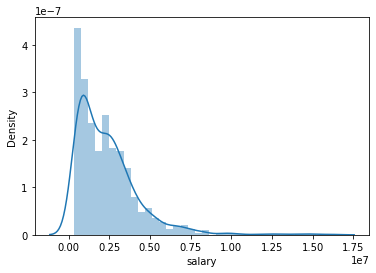

In [39]:
sns.distplot(df_players['salary'])

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

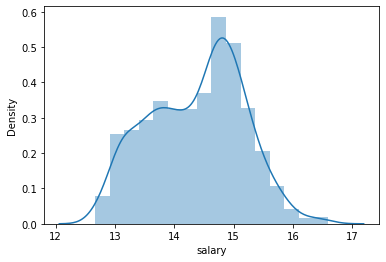

In [40]:
sns.distplot(np.log(df_players['salary']))

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

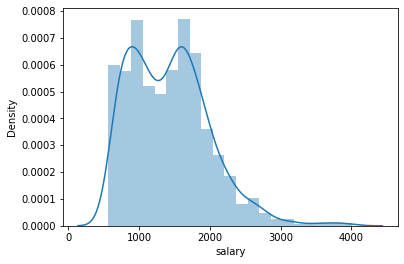

In [41]:
sns.distplot(np.sqrt(df_players['salary']))

In [42]:
df_players.columns.values

array(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'nameFirst', 'nameLast', 'weight', 'height', 'bats', 'throws',
       'debut', 'finalGame', 'awardWinner', 'voteWinner', 'G', 'AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
       'salary', 'seasons', 'prim_pos', 'G_p', 'W_p', 'L_p', 'GS_p', 'CG',
       'SHO_p', 'SV_p', 'IPouts', 'ER_p', 'HR_p', 'SO_p', 'IBB_p',
       'BAOpp', 'ERA', 'WP', 'HBP_p', 'BK', 'BFP', 'GF', 'R_p', 'SH_p',
       'SF_p', 'GIDP_p', 'WHIP', 'IP', 'BB_p'], dtype=object)

In [43]:
df1 = df_players[['playerID', 'throws']].copy()
df2 = df_players[['playerID', 'bats']].copy()

In [56]:
df_players['prim_pos'].value_counts()
print(df_players[df_players['prim_pos']=='1B'])

      playerID nameFirst     nameLast  weight  height       debut   finalGame  \
5    adamsma01      Matt        Adams   245.0    75.0  2012-05-20  2021-07-24   
12   alonsyo01    Yonder       Alonso   230.0    73.0  2010-09-01  2019-09-29   
52   bartoda02     Daric       Barton   215.0    72.0  2007-09-10  2014-05-13   
66    beltbr01   Brandon         Belt   231.0    75.0  2011-03-31  2021-09-26   
101  brousbe01       Ben    Broussard   220.0    74.0  2002-06-22  2008-05-02   
123  butlebi03     Billy       Butler   260.0    72.0  2007-05-01  2016-10-02   
148  cartech02     Chris       Carter   245.0    76.0  2010-08-09  2017-07-04   
170   choihe01  Hee-Seop         Choi   235.0    77.0  2002-09-03  2005-10-02   
200  craigal01     Allen        Craig   215.0    74.0  2010-04-08  2015-10-04   
217  davisch02     Chris        Davis   255.0    76.0  2008-06-26  2020-09-11   
218  davisik02       Ike        Davis   220.0    76.0  2010-04-19  2016-06-24   
281  fieldpr01    Prince    

In [45]:
df_players.drop(axis=1, columns=['birthYear','birthMonth','birthDay','birthCountry'],inplace=True, errors='raise')

In [46]:
df_players = pd.get_dummies(df_players, columns=['throws'], drop_first = True)
df_players = pd.get_dummies(df_players, columns=['bats'], drop_first = True)
df_players = pd.get_dummies(df_players, columns=['prim_pos'], drop_first = True)

In [60]:
print(df_players.shape)
df_players.loc[df_players['playerID']=='alonsyo01']

(994, 71)


,playerID,nameFirst,nameLast,weight,height,debut,finalGame,awardWinner,voteWinner,G,...,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,bats,prim_pos
12,alonsyo01,Yonder,Alonso,230.0,73.0,2010-09-01,2019-09-29,0,1,74.666667,...,0,0,0,0,0,0,0,R,L,1B


In [48]:
df_position.head()

,playerID,prim_pos
0,aardsda01,P
1,abadan01,1B
2,abadfe01,P
3,abercre01,OF
4,abernbr01,2B


In [49]:
df_players = pd.merge(df_players, df1, on = 'playerID',how = 'left')
df_players = pd.merge(df_players, df2, on = 'playerID',how = 'left')
df_players = pd.merge(df_players,df_position, on = 'playerID', how = 'left')
print(df_players.shape)

(994, 71)


In [50]:
df_players['awardWinner'] = np.where(df_players['awardWinner'] > 0,1,0)
df_players['voteWinner'] = np.where(df_players['voteWinner'] > 0,1,0)

In [51]:
print(df_players.shape)
df_players.head()

(994, 71)


,playerID,nameFirst,nameLast,weight,height,debut,finalGame,awardWinner,voteWinner,G,...,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,bats,prim_pos
0,aardsda01,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0,0,27.000000,...,1,0,0,0,0,1,0,R,R,P
1,abadfe01,Fernando,Abad,235.0,74.0,2010-07-28,2021-10-01,0,0,29.333333,...,0,0,0,0,0,1,0,L,L,P
2,abreuto01,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,0,48.666667,...,0,0,1,0,0,0,0,R,B,3B
3,accarje01,Jeremy,Accardo,195.0,72.0,2005-05-04,2012-09-27,0,0,52.333333,...,1,0,0,0,0,1,0,R,R,P
4,ackledu01,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,1,118.666667,...,0,1,0,0,0,0,0,R,L,2B


In [52]:
df_players.loc[df_players['playerID'] == 'abbotku01']

,playerID,nameFirst,nameLast,weight,height,debut,finalGame,awardWinner,voteWinner,G,...,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,bats,prim_pos


In [53]:
df_players.to_csv('rookie.csv')